# Sentiment Analysis using Naive Bayes

In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from cleaning_utils import clean_data, remove_stopwords, find_freqwords, tokenize_data

nltk.download('stopwords')
stop_words = stopwords.words()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ambershefl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Part 1: Data Preprocessing

##### Additional Information
You may wonder why we split up functions from their execution here in the notebook. If each cell can be executed by pressing the play button, why not just keep all the functionality in the cell itself? Why split off that functionality into separate functions in a separate file? They're good questions. Previous versions of this homework actually proceeded like that. However, these functions make autograding your assignments 20x easier. By being able to call these functions, we don't have to duplicate the data cleaning work in our unit testing files!

Pretty clever, huh?

In any case, **pay attention to the order in which these functions are called.** It'll give you a good idea of what to start implementing first.

In [2]:
data = pd.read_csv("tweets.csv", names=['sentiment', 'id', 'date', 'flag', 'user', 'tweet'])
cleaned_data = clean_data(data)

In [3]:
cleaned_data['tweet'] = remove_stopwords(cleaned_data['tweet'], stop_words)

/var/folders/95/x7fd8crn1nzdqw3y564945pm0000gn/T/ipykernel_23340/1934727201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['tweet'] = remove_stopwords(cleaned_data['tweet'], stop_words)


In [4]:
FREQWORDS = find_freqwords(cleaned_data["tweet"])

In [5]:
# remove frequent words that do not add value to the model
# remember that selecting a single column from a dataframe returns a list of datatype "Series".
# cleaned_data["tweet"] is a "Series" of values selected from the "DataFrame" cleaned_data
from cleaning_utils import remove_all_freqwords_from_all_tweets

cleaned_copy = cleaned_data.copy()
cleaned_copy["tweet"] = remove_all_freqwords_from_all_tweets(cleaned_copy["tweet"], FREQWORDS)


In [6]:

tokenized_data = tokenize_data(cleaned_copy)

### Part 2: Naive Bayes Implementation
Find and complete the functions in the nb_model file provided, then train and predict on that model in this notebook's following cells.

In [7]:
from nb_model import NaiveBayesModel

from sklearn.model_selection import train_test_split
from nb_model import NaiveBayesModel

# 1. Perform a train/test split (80% train, 20% test is standard)
X_train, X_test, y_train, y_test = train_test_split(
    tokenized_data['tweet'], 
    data['sentiment'], 
    test_size=0.2, 
    random_state=42
)

# 2. Initialize and train the model on the training set only
model = NaiveBayesModel()
model.train_model(X_train, y_train)

# TODO: train and predict using the Naive Bayes model implementation
predictions = []
for tweet in tokenized_data['tweet']:
    pred = model.predict(tweet)
    predictions.append(pred)


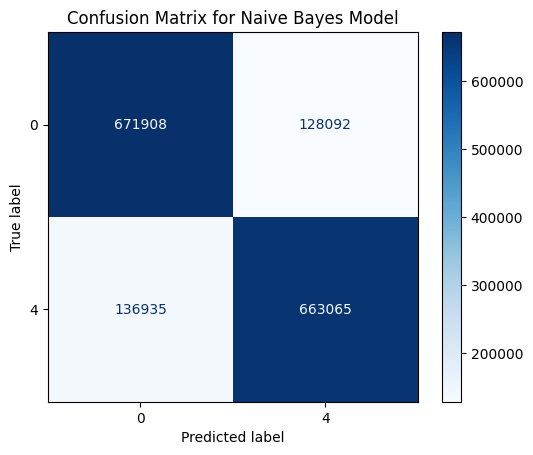


Individual Metrics:
Accuracy: 0.8344
Precision (weighted): 0.8344
Recall (weighted/sensitivity): 0.8344
F1 Score (weighted): 0.8344


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

#TODO - Create and display confusion matrices and evaluation metrics to prove the performance of your model.
# required: accuracy, recall, f-score
cm = confusion_matrix(data['sentiment'], predictions, labels=[0, 4])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 4])
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix for Naive Bayes Model")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(data['sentiment'], predictions)
precision = precision_score(data['sentiment'], predictions, average='weighted')
recall = recall_score(data['sentiment'], predictions, average='weighted')
f1 = f1_score(data['sentiment'], predictions, average='weighted')

print(f"\nIndividual Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted/sensitivity): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")